In [1]:
print("Jay Shree Krishna")

Jay Shree Krishna


In [2]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms


In [3]:
# Download training dataset
dataset = MNIST(root='data/', download=True,transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 80650451.97it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 108447353.47it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23250523.27it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18388541.28it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
import matplotlib.pyplot as plt

for d in dataset:
  # print(d[0])
  print(d[1])
  break

5


In [6]:
labels = torch.tensor([d[1] for d in dataset])

In [7]:
labels.shape

torch.Size([60000])

In [8]:
labels = labels.reshape(60000,1)

In [9]:
labels

tensor([[5],
        [0],
        [4],
        ...,
        [5],
        [6],
        [8]])

In [10]:
X = torch.stack([d[0] for d in dataset])

In [11]:
X.shape

torch.Size([60000, 1, 28, 28])

In [12]:
X = X.view(60000, 784)

In [13]:
X.shape

torch.Size([60000, 784])

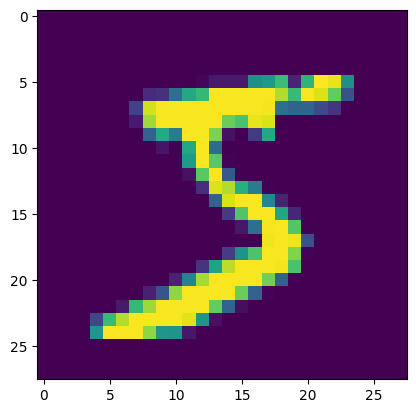

In [14]:
plt.imshow(X[0].reshape(28,28))

In [15]:
# Center the data by subtracting the mean
X_centered = X - torch.mean(X, dim=0)

In [16]:
# Calculate the covariance matrix
cov_matrix = torch.mm(X_centered.t().cuda(), X_centered.cuda()) / (X.size(0) - 1)

In [17]:
# Convert the covariance matrix to a PyTorch tensor
A = torch.tensor(cov_matrix, dtype=torch.float32).cuda()

<ipython-input-17-e651f5a374b4>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(cov_matrix, dtype=torch.float32).cuda()


In [18]:
# Find the eigenvalues and eigenvectors
L_complex, V_complex = torch.linalg.eigh(A)
L_real = L_complex.real

In [19]:
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = torch.argsort(L_real, descending=True)
sorted_L_real = L_real[sorted_indices]
sorted_V_real = V_complex[:, sorted_indices]

# Print the sorted eigenvalues and eigenvectors
print("Sorted Eigenvalues:")
print(sorted_L_real)
print("\nSorted Eigenvectors:")
print(sorted_V_real)

Sorted Eigenvalues:
tensor([ 5.1169e+00,  3.7414e+00,  3.2527e+00,  2.8416e+00,  2.5671e+00,
         2.2737e+00,  1.7252e+00,  1.5206e+00,  1.4563e+00,  1.2428e+00,
         1.1121e+00,  1.0666e+00,  9.0468e-01,  8.9218e-01,  8.3235e-01,
         7.8190e-01,  6.9839e-01,  6.7326e-01,  6.2600e-01,  6.0776e-01,
         5.6214e-01,  5.3080e-01,  5.0278e-01,  4.8115e-01,  4.6578e-01,
         4.4254e-01,  4.2844e-01,  4.1462e-01,  3.9267e-01,  3.6426e-01,
         3.4699e-01,  3.4174e-01,  3.1773e-01,  3.0928e-01,  3.0055e-01,
         2.8663e-01,  2.6668e-01,  2.5723e-01,  2.5384e-01,  2.4901e-01,
         2.4082e-01,  2.3454e-01,  2.2066e-01,  2.0996e-01,  2.0298e-01,
         1.9778e-01,  1.9087e-01,  1.8538e-01,  1.7930e-01,  1.6971e-01,
         1.6820e-01,  1.6493e-01,  1.5606e-01,  1.5235e-01,  1.4981e-01,
         1.4312e-01,  1.4211e-01,  1.3628e-01,  1.3380e-01,  1.2906e-01,
         1.2681e-01,  1.2615e-01,  1.2148e-01,  1.1680e-01,  1.1269e-01,
         1.0926e-01,  1.0706e-0

In [20]:
print(sorted_L_real.shape)
print(sorted_V_real.shape)

torch.Size([784])
torch.Size([784, 784])


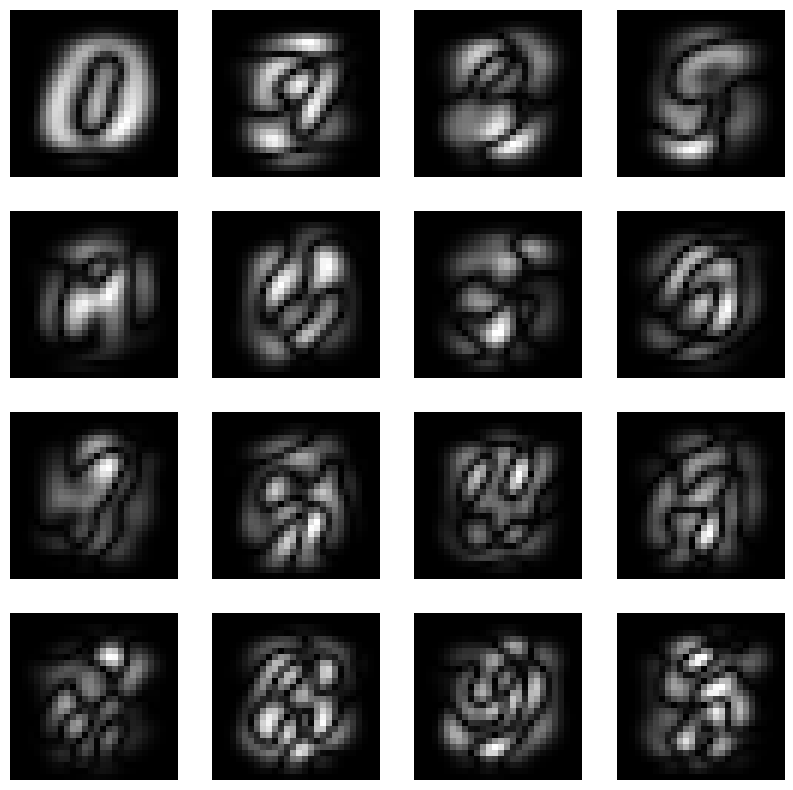

In [23]:
import numpy as np

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot the first 16 eigenvectors
for i in range(16):
    row = i // 4
    col = i % 4

    # Extract the i-th eigenvector
    eigenvector_i = sorted_V_real[:, i]

    # Plot the absolute value of the reshaped eigenvector
    axes[row, col].imshow(np.abs(eigenvector_i.cpu().reshape(28,28)), cmap='gray')
    axes[row, col].axis('off')

plt.show()

In [24]:
# Step 8: Project the Data onto the Selected Principal Components
alpha = torch.mm(X_centered.cuda() , sorted_V_real.cuda())

# Step 9: Reconstruct the Data (Optional)
X_reconstructed = torch.mm(alpha.cuda(),sorted_V_real.cuda().T) + torch.mean(X,axis=0).cuda()

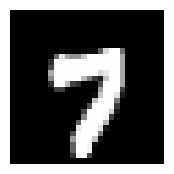

In [26]:
plt.figure(figsize=(2, 2))
plt.imshow(np.abs(X_reconstructed[1343].cpu().reshape(28,28)),cmap='gray')
plt.axis('off')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(img_original, img_predicted):
    mse = mean_squared_error(img_original.flatten(), img_predicted.flatten())
    rmse = np.sqrt(mse)
    return rmse

In [28]:
def average_rmse(X_reconstructed):
  i = 0
  rmse = 0
  for x in X:
    rmse += calculate_rmse(x,np.abs(X_reconstructed[i]))
    i = i + 1

  return rmse/i

In [29]:
X_reconstructed.shape

torch.Size([60000, 784])

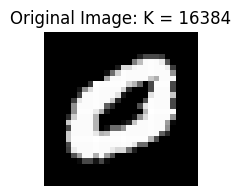

In [34]:
import random
random_number = random.randint(0, 59999)
# random_number = 1343

err_history = {}
output = []

plt.figure(figsize=(2, 2))

for kk in range(0,784,50):

  eigenvectors = sorted_V_real.T[:kk].T

  # Step 8: Project the Data onto the Selected Principal Components
  alpha = torch.mm(X_centered.cuda() , eigenvectors.cuda())
  # Step 9: Reconstruct the Data (Optional)
  X_reconstructed = torch.mm(alpha.cuda(),eigenvectors.T.cuda()) + torch.mean(X,axis=0).cuda()
  output.append(plt.imshow(np.abs(X_reconstructed[random_number].cpu().reshape(28,28)),cmap='gray'))
  reconstruction_error = average_rmse(X_reconstructed.cpu())
  err_history[kk] = reconstruction_error

plt.imshow(np.abs(X[random_number].cpu().reshape(28,28)),cmap='gray')
plt.axis('off')
plt.title("Original Image: K = 16384")
plt.show()

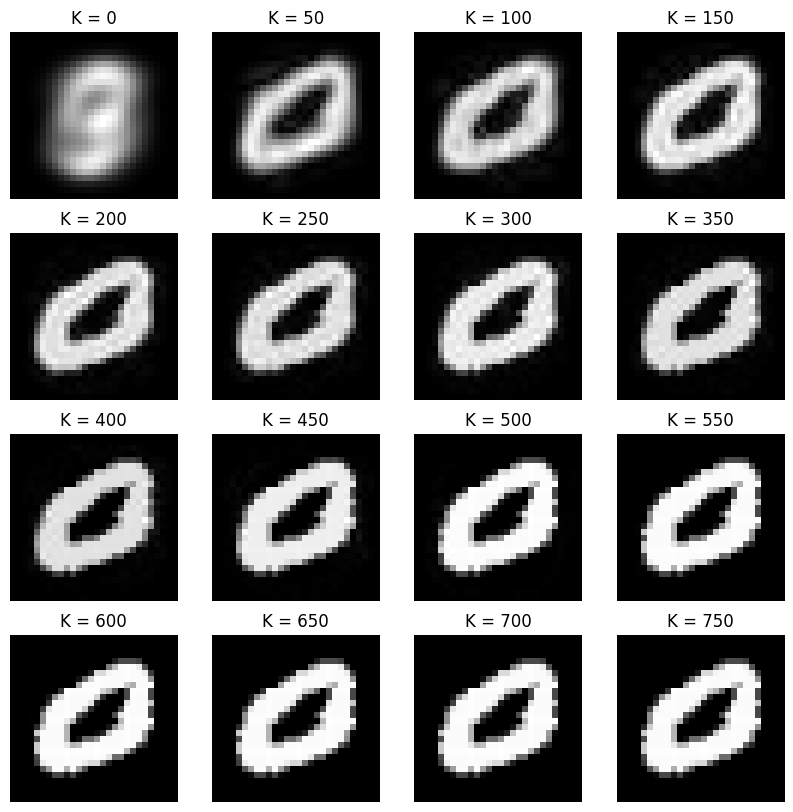

In [35]:
num_images = len(output)
rows = int(np.sqrt(num_images))
cols = int(np.ceil(num_images / rows))

# Create a subplot grid
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
list_of_k = list(err_history.keys())
# Display each image in the grid
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        if idx < num_images:
            axs[i, j].imshow(output[idx].get_array(), cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title("K = "+str(list_of_k[idx]))
plt.show()

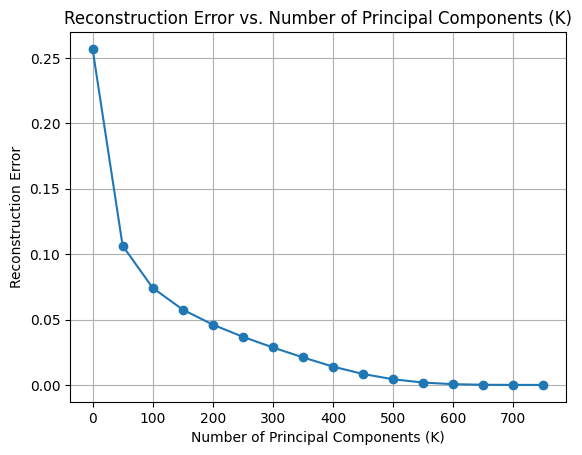

In [36]:
plt.plot(list(err_history.keys()), list(err_history.values()), marker='o')
plt.title('Reconstruction Error vs. Number of Principal Components (K)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()